# <div align="center">  <img src="logo.jpg" alt="isolated" width="100"/> </div> <div align="center" style="color:#FFA500"> Automatants </div>

# TP Réseaux de neurones

Dans ce premier TP nous allons coder notre premier réseau des neuronnes ! Nous allons mettre en application ce que nous avons appris à la formation d'introduction pour créer une IA capable de detecter des chiffres écrits à la main ! 

**Si vous bloquez à une question, n'hésitez surtout pas à appeler quelqu'un !**

**Quand il y a un # cela veut dire qu'il faut écrire quelque chose à la place.**

## Import des librairies

Ici on va importer numpy, matplotlib.pyplot et torch, torch.nn as nn et torchvision

In [64]:
#### Celulle à compléter ####


# import 
# import 
# import 
# import 
# import


## Téléchargement du dataset

Le premier dataset sur lequel on va entraîner un réseau de neurones est MNIST. Ce sont 60 000 images de chiffres de 0 à 9 en noir et blanc avec leur catégorie/label associé. Elles sont de taille 28x28 et de pixels à valeurs dans [0,255]. 


![alternative text](mnist.jpeg)

On vous a créé le code pour telecharger le dataset. Nous avons aussi normalisé les images entre 0 et 1. Il suffit d'exectuer le code fourni

In [65]:
### Load dataset
dataloader = torchvision.datasets.MNIST(root = "", download=True)
train_size = len(dataloader) * 0.8

X = np.empty((len(dataloader), 28,28))
Y = np.empty(len(dataloader))

for i, (image, label) in enumerate(dataloader):
    X[i] = image
    Y[i] = label

X = X / 255

X_train = X[:int(train_size)]
Y_train = Y[:int(train_size)]

X_test = X[int(train_size):]
Y_test = Y[int(train_size):]

print("Donwloaded Mnist Dataset")
print("Dataset size : ", len(dataloader))
print(f"Training using {len(X_train)} examples")
print(f"Testing using {len(X_test)} examples")



Donwloaded Mnist Dataset
Dataset size :  60000
Training using 48000 examples
Testing using 12000 examples


Le code suivant permet d'afficher quelques images du dataset

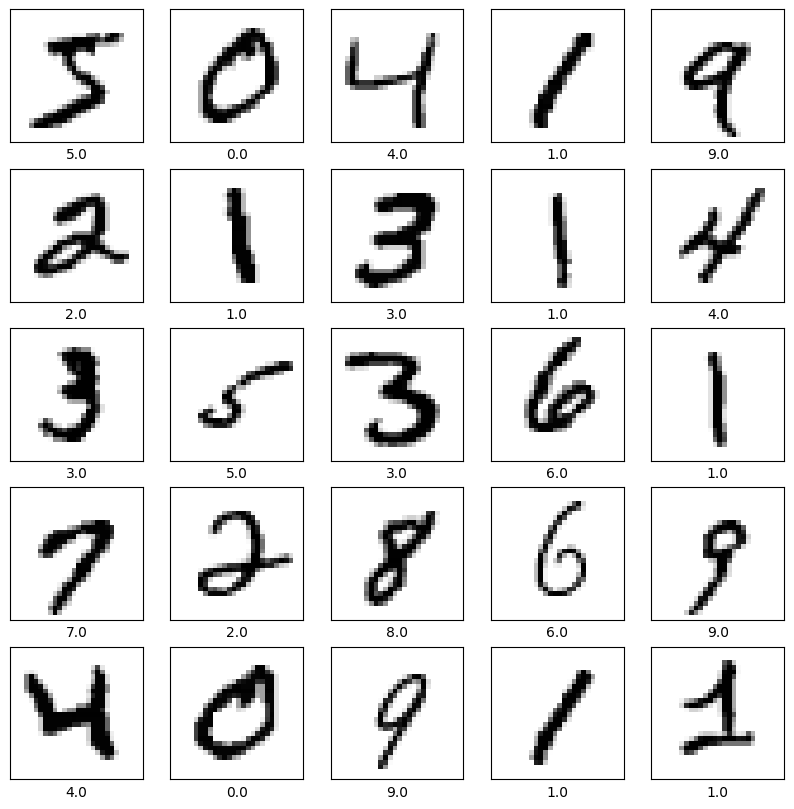

In [66]:
### Display data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(Y_train[i])

Ceci est bien gentil, mais essayons de comprendre un peu la structure de nos données. 

Nous avons à disposition ```X_train, Y_train, X_test, Y_test```

Commencons par ```X_train et X_test```

In [67]:
X_train.shape, X_test.shape

((48000, 28, 28), (12000, 28, 28))

Ce qu'on peut remarquer ce que X_train contient 48000 examples d'images de taile 28x28 
X_train contient 1200 images de la même taille

In [68]:
Y_train.shape, Y_test.shape

((48000,), (12000,))

Pour Y_train et Y_test, nous avons pareil 48000 et 12000 examples mais cette fois on a juste des entiers, cela correspond aux labels. Gardez ça en tête ! 


# Réseau de neurones

Nous pouvons maintenant commencer le TP ! Comme abordé lors de la première formation, nous allons utiliser les réseaux des neuronnes. 

Pour cela, nous allons procéder en 4  étapes :  : 
- On va d'abord définir notre réseau
- Puis définir une fonction de perte et une métode d'optimization
- Ensuite on pourra lancer l'entrainement, 
- A la fin, on pourra évaluer notre modèle


## Définition du modèle

Nous allons utiliser le module ```Sequential```  de Pytorch. Vous pouvez trouver des informations utiles dans la documentation de Pytorch : https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html

Essayer d'utiliser le couches ```nn.Linear``` et ```nn.ReLU``` pour reproduire le réseau que nous avons présenté lors de la formation ! N'oubliez pas d'ajouter la softmax à la fin ! 


In [69]:
#### Celulle à compléter ####
### Compléter la commande avec le réseau qu'on a vu pendant la formation

#
# model = nn.Sequential(

# )

Si vous appellez juste model, vous pouvez voir un résumé de votre modèle

In [70]:
model

Sequential(
  (0): Linear(in_features=784, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
  (5): Softmax(dim=1)
)

## Définition de la fonction de perte et de l'optimizer

On va utiliser la function MSELoss et le optimizer Adam (vous pouvez trouver de la documentation ici :https://pytorch.org/docs/stable/optim.html ): 

In [81]:
#### Celulle à compléter ####

# loss_function = 
# optimizer = 

## Entraînement
### Préliminaires

Avant de lancer la boucle d'entraînement, il faut préparer un peu le terrain : 

Rappelez vous que tout d'abord, il fallait "flatten" nos images d'entrée de 28*28 à un gros vecteur de taille 784

Ensuite, vous pouvez remarquer que les labels que nous avons à notre disposition ne sont pas dans le bon format ! Notre réseau sort un vecteur de probbilités, tandis que les labels dans Y_train sont des entiers. Il faut donc transformer les entiers dans des vecteurs de probabilité. Ceci s'appelle l'encodage one-hot. 

Exemple : 
5 devient [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] 



In [72]:
#### Celulle à compléter ####
# On commence par changer la structure de X_train. Nous voulons qqch de la forme (N, 28*28)

# X_train_flattened = X_train.reshape(DIMENSION, DIMENSION)

In [73]:
#### Celulle à compléter ####

# Appliquons maintenant un encodage one-hot de Y_train


# Encodage one hot
# Y_train_onehot = 
# Y_train_onehot

# Visualisons la forme de cette nouvelle matrice

Y_train_onehot.shape

(48000, 10)

Nous sommes presque prêts à entrainer. La dernière chose qui reste est de transformer nos arrays type numpy aux tensor type Pytorch. L'object tensor est un object spécifique à Pytorch, qui permet de faire des calculs spécifiques au Deep Learning de manière paralelisé, donc très efficace. 
Vous pouvez trouver plus des détails sur internet : https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html

Pour ce qui nous concerne, nous allons manipuler les tensors comme des arrays numpy

Maintenant vous allez entrainer votre modèle sur le dataset qui comporte les images (x_train) associées à leur label (y_train). Pour cela on utilise la méthode `model.fit(...)`.

L'argument epochs correspond au nombre de fois où le dataset est présenté au réseau de neurones. Ici mettez entre 1 et 20 epochs.

L'argument validation_data sert à vérifier que votre modèle est bon sur des images qu'il n'a jamais vues (pas utilisées dans l'entrainement), i.e. qu'il n'a pas "appris" le dataset par cœur.

Documentation : https://www.tensorflow.org/api_docs/python/tf/keras/Model

In [79]:
#### Celulle à compléter ####
# Convertissez vos arrays en tensor, verifiez que le type est bien float32

# X_train_torch = 
# Y_train_onehot_torch = 

In [78]:
# Code de vérification du type de vos tensors

Y_train_onehot_torch.dtype, X_train_torch.dtype, 

(torch.float64, torch.float64)

### Boucle d'entraînement 

In [127]:
#### Celulle à compléter ####
# epochs = 1


# for _ in range(epochs):
#     outputs = m # Calculer les predictions du modèle
    
#     loss =  # Calculer la loss

#     print(loss)

#     optimizer.zero_grad() # Mettre les gradients à 0

#     # Faire de la backpropagation
#     # Appliquer la formule de mise à jour des poids

    

tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.1513, grad_fn=<MseLossBackward0>)
tensor(0.15

Votre loss diminue, c'est déjà bon signe ! 

Mais est-ce que votre réseau est vraimenent performant ? Il est temps d'évaluer ses performances  !

## Evaluation du modèle

Il faut qu'on prépare les X_test et Y_test de la même manière que X_train et Y_train. Cependant, cette fois au lieu de transformer Y_test en one-hot, on va plutot transformer les predictions de notre modèle en entier.

In [113]:
#### Celulle à compléter ####

# Commencons par le changement de dimension et la transformation en tensor

# X_test_flatten = 
# X_test_flatten_torch = 


On peut faire passer donc X_test à travers le réseau et récuperer la sortie

In [114]:
outputs = model(X_test_flatten_torch)
outputs.shape

torch.Size([12000, 10])

Transformons maintenant les vecteurs de probabilité en entiers

In [115]:
predicted_labels = outputs.argmax(axis=1)

In [116]:
diff = predicted_labels - Y_test
accuracy = len(diff[diff==0]) / len(diff)
accuracy

0.8451666666666666

## Améliorations possibles

Bravo ! Vous avez entrainé votre réseau et évalué votre modèle. Nous allons maintenant essayer d'améliorer un peu votre boucle d'entraînement. 

D'abord on va entrainer pour plusieurs epochs, donc on veut afficher la loss que périodiqement. Ensuite, il serait intéresant de tracer l'évolution de notre courbe de loss. 
Finalement, on pourrait aussi evaluer le modèle à chaque fois qu'on calcule la loss pour avoir une idée plus précise de la performance du modèle


On va commencer par les deux premières étapes

tensor(0.0133, grad_fn=<MseLossBackward0>)
tensor(0.0130, grad_fn=<MseLossBackward0>)
tensor(0.0127, grad_fn=<MseLossBackward0>)
tensor(0.0124, grad_fn=<MseLossBackward0>)
tensor(0.0122, grad_fn=<MseLossBackward0>)
Fin de l'entraînement


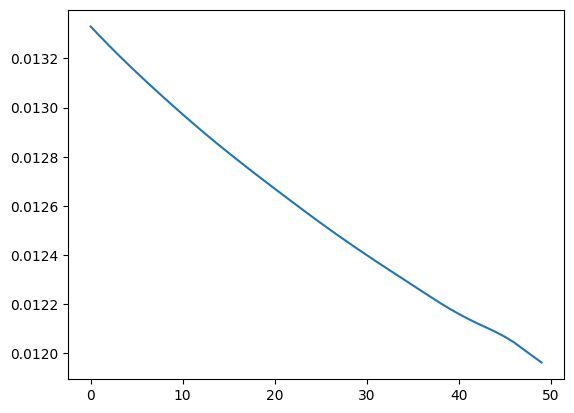

In [121]:
#### Celulle à compléter ####
epochs = 50
losses = []

# A compléter

# for i in range(epochs):
    # A vous de jouer ! 


Ecrivos maintenant une fonction ```evaluate_model()``` qui permet de calculer la précision du modèle

In [1]:
#### Celulle à compléter ####

def evaluate_model(model):
    pass
    # A vous de jouer ! 

Nous avons tous les éléments maintenant pour créer une bonne boucle d'entraînement. Nous allons redéfinir notre modèle pour initialiser nos poids et commencer table rase (Attention à rédefinir l'optimizer parce que 
nous avons des nouveaus paramètres maintenant): 

Début de l'entraînement
Epoch 0 | Loss : 0.16924981772899628 | Accuracy : 0.13641666666666666
Epoch 50 | Loss : 0.039741333574056625 | Accuracy : 0.6745
Epoch 100 | Loss : 0.01580156199634075 | Accuracy : 0.9018333333333334
Epoch 150 | Loss : 0.010563401505351067 | Accuracy : 0.927
Fin de l'entraînement


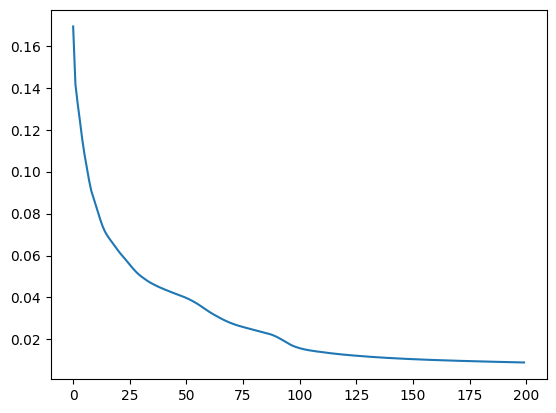

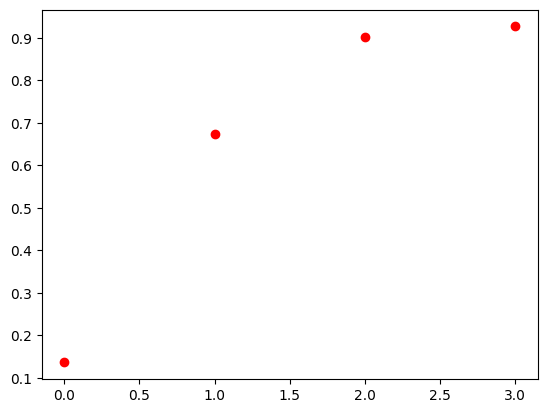

In [143]:
#### Celulle à compléter ####
epochs = 200
losses = []
accuracies = []


# model = 

# loss_function = 
# optimizer = 

print("Début de l'entraînement")

for i in range(epochs):
    # outputs =  # Calculer les predictions du modèle
    
    # loss =  # Calculer la loss
    # losses.append(?????)

    # optimizer.zero_grad() # Mettre les gradients à 0

    # ___________________ # Faire de la backpropagation
    # _______________ # Appliquer la formule de mise à jour des poids

    if i % 50 == 0:
        accuracy = evaluate_model(model)
        print(f"Epoch {i} | Loss : {loss} | Accuracy : {accuracy}")
        accuracies.append(accuracy)




print("Fin de l'entraînement")
plt.plot(losses)
plt.figure()
plt.plot(accuracies, "o", color="red")


In [151]:
sum(p.numel() for p in model.parameters() if p.requires_grad) # compte le nombre des paramètres

13002

## A vous de jouer ! Est-ce que vous pouvez faire mieux ? 


In [10]:
import cv2
import numpy as np

drawing = False  # true if mouse is pressed
pt1_x, pt1_y = None, None


# mouse callback function
def line_drawing(event, x, y, flags, param):
    global pt1_x, pt1_y, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        pt1_x, pt1_y = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.line(img, (pt1_x, pt1_y), (x, y), color=(255, 255, 255), thickness=3)
            pt1_x, pt1_y = x, y
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.line(img, (pt1_x, pt1_y), (x, y), color=(255, 255, 255), thickness=3)


img = np.zeros((512, 512, 3), np.uint8)
cv2.namedWindow("test draw")
cv2.setMouseCallback("test draw", line_drawing)

frames = 1
while True:
    cv2.imshow("test draw", img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
    
    if frames % 100 == 0:
        img_resized = cv2.resize(img, (28, 28))
        img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
        img_resized = img_resized / 255
        img_resized = img_resized.reshape(1, 28*28)
        img_resized = torch.from_numpy(img_resized).float()
        outputs = model(img_resized)
        predicted_label = outputs.argmax(axis=1)
        print(f"Predicted label : {predicted_label}")
        img = np.zeros((512, 512, 3), np.uint8)

    frames += 1     


cv2.destroyAllWindows()

[255 255 255 ... 255 255 255]
